In [ ]:
%load_ext autoreload
%autoreload 2

In [70]:
import forward as fwd
import scipy

import autograd.numpy as np
from autograd import grad, elementwise_grad as e_grad, make_jvp, make_vjp, jacobian

import matplotlib
matplotlib.use("pgf")
matplotlib.rcParams.update({
    "pgf.texsystem": "pdflatex",
    'font.family': 'serif',
    'text.usetex': True,
    'pgf.rcfonts': False,
})
import matplotlib.pyplot as plt
#%matplotlib widget
from time import time

In [ ]:
import importlib
importlib.reload(fwd)

<module 'forward' from 'C:\\Users\\GabrielBelouze\\Documents\\work\\forward\\src\\forward\\__init__.py'>

In [ ]:
def runAndLog(theta0, opt):
    t0 = time()
    t_hist = []
    theta_hist = []
    f_hist = []
    df_hist = []
    def hook(epoch, theta, f_theta, df_theta):
        t_hist.append(time() - t0)
        theta_hist.append(theta)
        f_hist.append(f_theta)
        df_hist.append(np.linalg.norm(df_theta))
        
    opt.run(theta0, epoch_hook=hook)
    return t_hist, theta_hist, f_hist, df_hist

In [ ]:
fig, ax = plt.subplots(1,1, figsize=(6,6))
cmap = plt.get_cmap()
for j in range(2):
    x = np.array([1, (-1)**j])
    X = np.stack([-x, x], axis=1)
    ax.plot(*X, "--", color=cmap(0), alpha=0.4)
    ax.scatter(*x, color=cmap(0))
    ax.scatter(*-x, color=cmap(0))
theta = np.random.rand()
rot = np.array([
    [np.cos(theta), -np.sin(theta)],
    [np.sin(theta),  np.cos(theta)]])
for j in range(2):
    x = rot@np.array([1, (-1)**j])
    X = np.stack([-x, x], axis=1)
    ax.plot(*X, "--", color=cmap(150), alpha=0.4)
    ax.scatter(*x, color=cmap(150))
    ax.scatter(*-x, color=cmap(150))
# Move left y-axis and bottim x-axis to centre, passing through (0,0)
ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position('center')
# Eliminate upper and right axes
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

from matplotlib.lines import Line2D
custom_lines = [Line2D([0], [0], color=cmap(0), lw=2),
                Line2D([0], [0], color=cmap(150), lw=2)]
ax.legend(custom_lines, ['Canonical minimal tangent law', 'Another minimal tangent law'])


ax.set_xticks([-1,1])
ax.set_yticks([-1,1])


plt.gcf().set_size_inches(8, 8)
raise ValueError("Do you really want to replace this image ?")
plt.savefig("../../report/images/2d_rademacher_distributions.png", bbox_inches="tight", dpi=100, transparent=True)
plt.show()

In [ ]:
ax = plt.axes(projection="3d")
cmap = plt.get_cmap()

for j in range(2):
    for k in range(2):
        x = np.array([1, (-1)**j, (-1)**k])
        X = np.stack([-x, x], axis=1)
        ax.plot(*X, "--", color=cmap(0), alpha=0.6, lw=2)
        ax.scatter(*x,  color=cmap(0), s=70 )
        ax.scatter(*-x, color=cmap(0), s=70)
for i in range(3):
    x = np.array([1 if j==i else 0 for j in range(3)])
    X = np.stack([np.zeros(3), x], axis=1)
    ax.plot(*X, color="black", lw=3)
ax.view_init(30, 30)
xlim = ax.get_xlim3d()
ylim = ax.get_ylim3d()
zlim = ax.get_zlim3d()
ax.set_xticks([])
ax.set_yticks([])
ax.set_zticks([])
plt.axis('off')
plt.gcf().set_size_inches(8, 8)
raise ValueError("Do you really want to replace this image ?")
plt.savefig("../../report/images/3d_canonical_rademacher_distribution.png", bbox_inches="tight", dpi=100, transparent=True)
plt.show()

ax = plt.axes(projection="3d")
theta = np.pi*np.random.rand()
direction = np.random.rand(3)
direction /= np.linalg.norm(direction)
rotvec = theta * direction
rot = scipy.spatial.transform.Rotation.from_rotvec(rotvec).as_matrix()
for j in range(2):
    for k in range(2):
        x = rot@np.array([1, (-1)**j, (-1)**k])
        X = np.stack([-x, x], axis=1)
        ax.plot(*X, "--", color=cmap(150), alpha=0.6, lw=2)
        ax.scatter(*x,  color=cmap(150), s=70)
        ax.scatter(*-x, color=cmap(150), s=70)
        
for i in range(3):
    x = np.array([1 if j==i else 0 for j in range(3)])
    X = np.stack([np.zeros(3), x], axis=1)
    ax.plot(*X, color="black", lw=3)
for i in range(3):
    x = rot@np.array([1 if j==i else 0 for j in range(3)])
    X = np.stack([np.zeros(3), x], axis=1)
    ax.plot(*X, color=cmap(150), lw=3)
ax.view_init(30, 30)
ax.set_xlim3d(xlim)
ax.set_ylim3d(ylim)
ax.set_zlim3d(zlim)
ax.set_xticks([])
ax.set_yticks([])
ax.set_zticks([])
plt.axis('off')
plt.gcf().set_size_inches(8, 8)
raise ValueError("Do you really want to replace this image ?")
plt.savefig("../../report/images/3d_rotated_rademacher_distribution.png", bbox_inches="tight", dpi=100, transparent=True)
plt.show()



In [ ]:
f = fwd.objectives.spiral
df = fwd.df(f)
df_fwd = fwd.df_fwd(f, sampler=fwd.samplers.rademacher)
opt = fwd.opt.adabelief()(df, epochs=1_000)
opt_fwd = fwd.opt.adabelief()(df_fwd, epochs=1_000)

ax = plt.axes(projection="3d")

def show(opt, theta0, c, alpha=1):
    _, theta_hist, f_hist, _ = runAndLog(theta0, opt)
    x, y, z = np.array(theta_hist).T
    ax.plot3D(x, y, z, alpha=alpha, c=c)

cmap = plt.get_cmap()

theta0 = np.array([0., 0., 20.])
show(opt, theta0, c=cmap(0))
for _ in range(10):
    #theta0 = np.array([2*np.random.rand()-1, 2*np.random.rand()-1, 10.])
    show(opt_fwd, theta0, c=cmap(100), alpha=0.3)

ax.set_xticks([])
ax.set_yticks([])
ax.set_zticks([])
plt.axis('off')
plt.gcf().set_size_inches(8, 8)
raise ValueError("Do you really want to replace the title page image ?")
plt.savefig("../../report/images/title_page.png", bbox_inches="tight", dpi=100, transparent=True)
plt.show()

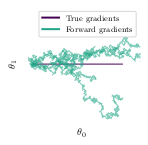

In [81]:
dim = 50
f = lambda x: fwd.objectives.explode(x, theta=np.array([-1., 0., *[1 for _ in range(dim-2)]]))
df = fwd.df(f)
df_fwd = fwd.df_fwd(f, sampler=fwd.samplers.rademacher)
opt = fwd.opt.sgd()(df, epochs=1_000)
opt_fwd = fwd.opt.sgd()(df_fwd, epochs=1_000)

fig, ax = plt.subplots(1, 1, figsize=(8,8))
def show(opt, theta0, **kwargs):
    t_hist, theta_hist, f_hist, _ = runAndLog(theta0, opt)
    x, y, *_ = np.array(theta_hist).T
    ax.plot(x, y, **kwargs)
    return f_hist[-1]

#X, Y = np.meshgrid(np.linspace(-1, 12, 400), np.linspace(-6, 6, 400))
#Z = np.stack([X, Y, *[np.zeros(X.shape) for _ in range(dim - 2)]], axis=0)
#ax.scatter(X, Y, c=f(Z), cmap="gray", alpha=0.1)

cmap = plt.get_cmap()

theta0 = np.zeros(dim)
loss = show(opt, theta0, c=cmap(0), lw=1)
loss_forward = 0 
for _ in range(5):
    loss_forward += show(opt_fwd, theta0, c=cmap(150), alpha=0.6, lw=1)

axs[0].set_xlim(-8, 0)
axs[0].set_ylim(-8, 0)

from matplotlib.lines import Line2D
custom_lines = [Line2D([0], [0], color=cmap(0), lw=2),
                Line2D([0], [0], color=cmap(150), lw=2)]
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.set_yticks([])
ax.set_xticks([])
ax.set_xlim(-1, 12)
ax.set_ylim(-6, 6)
ax.set_xlabel("$\\theta_0$")
ax.set_ylabel("$\\theta_1$")


ax.legend(custom_lines, ['True gradients', 'Forward gradients'], fontsize="small")

fig.set_size_inches(0.45*4.65, 0.45*4.65)
raise ValueError("Do you really want to replace the title page image ?")
plt.savefig("../../report/images/sgd_forward_v_reverse_linear_objective_theta.pgf", bbox_inches="tight", dpi=100, transparent=True)

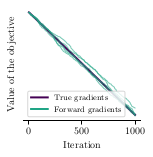

In [80]:
dim = 50
f = lambda x: fwd.objectives.explode(x, theta=np.array([-1., 0., *[1 for _ in range(dim-2)]]))
df = fwd.df(f)
df_fwd = fwd.df_fwd(f, sampler=fwd.samplers.rademacher)
opt = fwd.opt.sgd()(df, epochs=1_000)
opt_fwd = fwd.opt.sgd()(df_fwd, epochs=1_000)

fig, ax = plt.subplots(1, 1, figsize=(8,8))
def show(opt, theta0, **kwargs):
    t_hist, theta_hist, f_hist, _ = runAndLog(theta0, opt)
    x, y, *_ = np.array(theta_hist).T
    ax.plot((f_hist), **kwargs)
    return f_hist[-1]

X, Y = np.meshgrid(np.linspace(-10, 0, 120), np.linspace(-10, 0, 120))
Z = np.stack([X, Y, *[np.zeros(X.shape) for _ in range(dim - 2)]], axis=0)

cmap = plt.get_cmap()

theta0 = np.zeros(dim)
loss = show(opt, theta0, c=cmap(0), lw=2)
loss_forward = 0 
for _ in range(5):
    loss_forward += show(opt_fwd, theta0, c=cmap(150), alpha=0.6, lw=1)

from matplotlib.lines import Line2D
custom_lines = [Line2D([0], [0], color=cmap(0), lw=2),
                Line2D([0], [0], color=cmap(150), lw=2)]
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.set_yticks([])
ax.legend(custom_lines, ['True gradients', 'Forward gradients'], fontsize="small")
ax.set_xlabel("Iteration")
ax.set_ylabel("Value of the objective")


fig.set_size_inches(0.45*4.65, 0.45*4.65)

raise ValueError("Do you really want to replace the title page image ?")
plt.savefig("../../report/images/sgd_forward_v_reverse_linear_objective.pgf", bbox_inches="tight", dpi=100, transparent=True)

In [5]:
rate = []
dims = []
for dim in range(2, 150):
    dim = dim ** 2
    f = lambda x: fwd.objectives.explode(x, theta=np.ones(dim))
    df = fwd.df(f)
    df_fwd = fwd.df_fwd(f, sampler=fwd.samplers.rademacher)
    opt = fwd.opt.adam()(df, epochs=1_000)
    opt_fwd = fwd.opt.adam()(df_fwd, epochs=1_000)

    #fig, axs = plt.subplots(1, 2, figsize=(16,8))
    def show(opt, theta0, c, alpha=1):
        t_hist, theta_hist, f_hist, _ = runAndLog(theta0, opt)
        x, y, *_ = np.array(theta_hist).T
        #axs[0].plot(x, y, alpha=alpha, c=c)
        #axs[1].plot(np.abs(f_hist), c=c, alpha=alpha)
        return f_hist[-1]

    X, Y = np.meshgrid(np.linspace(-10, 0, 120), np.linspace(-10, 0, 120))
    Z = np.stack([X, Y, *[np.zeros(X.shape) for _ in range(dim - 2)]], axis=0)
    #axs[0].scatter(X, Y, c=f(Z), cmap="gray")

    cmap = plt.get_cmap()

    theta0 = np.zeros(dim)
    loss = show(opt, theta0, c=cmap(0))
    loss_forward = 0 
    for _ in range(5):
        #theta0 = np.array([2*np.random.rand()-1, 2*np.random.rand()-1, 10.])
        loss_forward += show(opt_fwd, theta0, c=cmap(100), alpha=0.3)

    rate.append(loss / loss_forward)
    dims.append(dim)
    #axs[0].set_xlim(-8, 0)
    #axs[0].set_ylim(-8, 0)

    #plt.show()
plt.plot(dims, rate)

KeyboardInterrupt: 

In [ ]:
rates = np.array(rate)
dims = np.array(dims)
A = np.sqrt(dims)[:, None]
x, res, _, _ = np.linalg.lstsq(A, rates, rcond=None)

In [ ]:
plt.plot(dims, rate)
plt.plot(dims, A@x)

In [ ]:
print(x)
print(np.sqrt(1/np.pi))

## Toy objectives

In [ ]:
from matplotlib.lines import Line2D

def compareAdModes(f, optimiser, theta0, epochs, lr, axs, lims=((-1, 1), (-1, 1)), loss_lims=None):
    """Compare sgd convergence speed for the 2D function `f` for
    - Exact gradient computed through reverse mode
    - Forward gradient with normally distributed tangents
    - Forward gradient with Rademacher-distributed tangents
    """
    f_ = lambda theta: f(*theta)
    
    df          = fwd.df(f_)
    df_fwd_rad  = fwd.df_fwd(f_, sampler=fwd.samplers.rademacher)
    df_fwd_nrml = fwd.df_fwd(f_, sampler=fwd.samplers.gaussian)
    
    opt          = optimiser(df,          epochs=epochs, lr=lr)
    opt_fwd_rad  = optimiser(df_fwd_rad,  epochs=epochs, lr=lr)
    opt_fwd_nrml = optimiser(df_fwd_nrml, epochs=epochs, lr=lr)
    
    X, Y = np.meshgrid(np.linspace(*lims[0], 200), np.linspace(*lims[1], 100))
    axs[3].scatter(X, Y, marker=".", c=(f(X, Y)), cmap="PiYG")
    
    def runAndPlot(opt, color, alpha):
        t_hist, theta_hist, f_hist, df_hist = runAndLog(theta0, opt)
        
        axs[0].semilogy(f_hist, color=color, alpha=alpha)
        axs[1].semilogy(t_hist, f_hist, color=color, alpha=alpha)
        axs[2].plot(t_hist, color=color, alpha=alpha)
        axs[3].plot(*np.array(theta_hist).T, color=color, alpha=alpha)
        axs[4].semilogy(df_hist[1:], color=color, alpha=alpha)
    
    for _ in range(5):
        runAndPlot(opt_fwd_rad, "blue", 0.3)
        runAndPlot(opt_fwd_nrml, "red", 0.3)
    runAndPlot(opt, "green", 1)
    
    custom_lines = [Line2D([0], [0], color="blue", lw=1),
                    Line2D([0], [0], color="red", lw=1),
                    Line2D([0], [0], color="green", lw=1)]
    axs[0].legend(custom_lines, ["Rademacher forward AD", "Gaussian forward AD", "Reverse AD"])
    
    axs[0].set_xlabel("iterations")
    axs[0].set_ylabel("f(θ)")
    axs[1].set_xlabel("Time (s)")
    axs[1].set_ylabel("f(θ)")
    axs[2].set_xlabel("iterations")
    axs[2].set_ylabel("Time (s)")
    axs[3].set_xlabel("x")
    axs[3].set_ylabel("y")
    axs[4].set_xlabel("iterations")
    axs[4].set_ylabel("||∇f||")
    
    bottom, _ = axs[4].get_ylim()
    if bottom < 1e-10:
        axs[4].set_ylim(bottom=1e-10)
    
    if loss_lims is not None:
        axs[0].set_ylim(*loss_lims)
        axs[1].set_ylim(*loss_lims)

    axs[3].set_xlim(*lims[0])
    axs[3].set_ylim(*lims[1])
    

def compareAdaFwd(f, theta0, epochs, lr, axs, lims=((-1, 1), (-1, 1)), loss_lims=None):
    f_ = lambda theta: f(*theta)
    
    opt = fwd.opt.adaforward()(f_, epochs=epochs, lr=lr)
    
    X, Y = np.meshgrid(np.linspace(*lims[0], 200), np.linspace(*lims[1], 100))
    axs[3].scatter(X, Y, marker=".", c=(f(X, Y)), cmap="PiYG")
    
    def runAndPlot(opt, color, alpha):
        t_hist, theta_hist, f_hist, df_hist = runAndLog(theta0, opt)
        
        axs[0].semilogy(f_hist, color=color, alpha=alpha)
        axs[1].semilogy(t_hist, f_hist, color=color, alpha=alpha)
        axs[2].plot(t_hist, color=color, alpha=alpha)
        axs[3].plot(*np.array(theta_hist).T, color=color, alpha=alpha)
        axs[4].semilogy(df_hist[1:], color=color, alpha=alpha)
    
    for _ in range(5):
        runAndPlot(opt, "blue", 0.3)
    
    custom_lines = [Line2D([0], [0], color="blue", lw=1)]
    axs[0].legend(custom_lines, ["Rademacher forward AD"])
    
    axs[0].set_xlabel("iterations")
    axs[0].set_ylabel("f(θ)")
    axs[1].set_xlabel("Time (s)")
    axs[1].set_ylabel("f(θ)")
    axs[2].set_xlabel("iterations")
    axs[2].set_ylabel("Time (s)")
    axs[3].set_xlabel("x")
    axs[3].set_ylabel("y")
    axs[4].set_xlabel("iterations")
    axs[4].set_ylabel("||∇f||")
    
    bottom, _ = axs[4].get_ylim()
    if bottom < 1e-10:
        axs[4].set_ylim(bottom=1e-10)
    
    if loss_lims is not None:
        axs[0].set_ylim(*loss_lims)
        axs[1].set_ylim(*loss_lims)

    axs[3].set_xlim(*lims[0])
    axs[3].set_ylim(*lims[1])
    
    
def compareAdModesND(f, optimiser, theta0, epochs, lr, axs, loss_lims=None):
    """Compare sgd convergence speed for the 2D function `f` for
    - Exact gradient computed through reverse mode
    - Forward gradient with normally distributed tangents
    - Forward gradient with Rademacher-distributed tangents
    """
    
    df          = fwd.df(f)
    df_fwd_rad  = fwd.df_fwd(f, sampler=fwd.samplers.rademacher)
    df_fwd_nrml = fwd.df_fwd(f, sampler=fwd.samplers.gaussian)
    
    opt          = optimiser(df,          epochs=epochs, lr=lr)
    opt_fwd_rad  = optimiser(df_fwd_rad,  epochs=epochs, lr=lr)
    opt_fwd_nrml = optimiser(df_fwd_nrml, epochs=epochs, lr=lr)
    
    def runAndPlot(opt, color, alpha):
        t_hist, theta_hist, f_hist, df_hist = runAndLog(theta0, opt)
        
        axs[0].semilogy(f_hist, color=color, alpha=alpha)
        axs[1].semilogy(t_hist, f_hist, color=color, alpha=alpha)
        axs[2].plot(t_hist, color=color, alpha=alpha)
        axs[3].semilogy(df_hist[1:], color=color, alpha=alpha)
    
    for _ in range(5):
        runAndPlot(opt_fwd_rad, "blue", 0.3)
        runAndPlot(opt_fwd_nrml, "red", 0.3)
    runAndPlot(opt, "green", 1)
    
    custom_lines = [Line2D([0], [0], color="blue", lw=1),
                    Line2D([0], [0], color="red", lw=1),
                    Line2D([0], [0], color="green", lw=1)]
    axs[0].legend(custom_lines, ["Rademacher forward AD", "Gaussian forward AD", "Reverse AD"])
    
    axs[0].set_xlabel("iterations")
    axs[0].set_ylabel("f(θ)")
    axs[1].set_xlabel("Time (s)")
    axs[1].set_ylabel("f(θ)")
    axs[2].set_xlabel("iterations")
    axs[2].set_ylabel("Time (s)")
    axs[3].set_xlabel("iterations")
    axs[3].set_ylabel("||∇f||")
    
    bottom, _ = axs[3].get_ylim()
    if bottom < 1e-10:
        axs[3].set_ylim(bottom=1e-10)
    
    if loss_lims is not None:
        axs[0].set_ylim(*loss_lims)
        axs[1].set_ylim(*loss_lims)

def compareAdaFwdND(f, theta0, epochs, lr, axs, loss_lims=None):  
    opt = fwd.opt.adaforward()(f, epochs=epochs, lr=lr)
    
    def runAndPlot(opt, color, alpha):
        t_hist, theta_hist, f_hist, df_hist = runAndLog(theta0, opt)
        
        axs[0].semilogy(f_hist, color=color, alpha=alpha)
        axs[1].semilogy(t_hist, f_hist, color=color, alpha=alpha)
        axs[2].plot(t_hist, color=color, alpha=alpha)
        axs[3].semilogy(df_hist[1:], color=color, alpha=alpha)
    
    for _ in range(5):
        runAndPlot(opt, "blue", 0.3)
    
    custom_lines = [Line2D([0], [0], color="blue", lw=1)]
    axs[0].legend(custom_lines, ["Rademacher forward AD"])
    
    axs[0].set_xlabel("iterations")
    axs[0].set_ylabel("f(θ)")
    axs[1].set_xlabel("Time (s)")
    axs[1].set_ylabel("f(θ)")
    axs[2].set_xlabel("iterations")
    axs[2].set_ylabel("Time (s)")
    axs[3].set_xlabel("iterations")
    axs[3].set_ylabel("||∇f||")
    
    bottom, _ = axs[3].get_ylim()
    if bottom < 1e-10:
        axs[3].set_ylim(bottom=1e-10)
    
    if loss_lims is not None:
        axs[0].set_ylim(*loss_lims)
        axs[1].set_ylim(*loss_lims)
    

### Beale

In [ ]:
fig, axs = plt.subplots(1, 5, figsize=(20, 5))
fig.suptitle("Sgd")
compareAdModes(
    f=fwd.objectives.beale,
    optimiser=fwd.opt.sgd(),
    theta0=np.array([0., 0.5]),
    epochs=5_000,
    lr=0.01,
    axs=axs,
    lims=((-0.1, 3.1),(-0.4, 0.7)),
    loss_lims=(1e-8, 100))
plt.show()

fig, axs = plt.subplots(1, 5, figsize=(20, 5))
fig.suptitle("Sgd with momentum")
compareAdModes(
    f=fwd.objectives.beale,
    optimiser=fwd.opt.sgd(momentum=0.9),
    theta0=np.array([0., 0.5]),
    epochs=5_000,
    lr=0.01,
    axs=axs,
    lims=((0, 3),(-0.4, 0.7)),
    loss_lims=(1e-8, 100))
plt.show()

fig, axs = plt.subplots(1, 5, figsize=(20, 5))
fig.suptitle("Adam")
compareAdModes(
    f=fwd.objectives.beale,
    optimiser=fwd.opt.adam(),
    theta0=np.array([0., 0.5]),
    epochs=10_000,
    lr=0.01,
    axs=axs,
    lims=((0, 3),(-0.4, 0.7)),
    loss_lims=(1e-8, 100))
plt.show()

fig, axs = plt.subplots(1, 5, figsize=(20, 5))
fig.suptitle("AdaBelief")
compareAdModes(
    f=fwd.objectives.beale,
    optimiser=fwd.opt.adabelief(),
    theta0=np.array([0., 0.5]),
    epochs=10_000,
    lr=0.01,
    axs=axs,
    lims=((0, 3),(-0.4, 0.7)),
    loss_lims=(1e-8, 100))
plt.show()

fig, axs = plt.subplots(1, 5, figsize=(20, 5))
fig.suptitle("AdaForward")
compareAdaFwd(
    f=fwd.objectives.beale,
    theta0=np.array([0., 0.5]),
    epochs=10_000,
    lr=0.01,
    axs=axs,
    lims=((0, 3),(-0.4, 0.7)),
    loss_lims=(1e-8, 100))
plt.show()

### Rosenbrock

In [ ]:
fig, axs = plt.subplots(1, 5, figsize=(20, 5))
fig.suptitle("Sgd")
compareAdModes(
    f=fwd.objectives.rosenbrock,
    optimiser=fwd.opt.sgd(),
    theta0=np.array([-1., 0.]),
    epochs=10_000,
    lr=0.0005,
    axs=axs,
    lims=((-1.1, 1.1),(-0.2, 1.1)),
    loss_lims=(1e-5, 100))
plt.show()

fig, axs = plt.subplots(1, 5, figsize=(20, 5))
fig.suptitle("Sgd with momentum")
compareAdModes(
    f=fwd.objectives.rosenbrock,
    optimiser=fwd.opt.sgd(momentum=0.9),
    theta0=np.array([-1., 0.]),
    epochs=10_000,
    lr=0.0005,
    axs=axs,
    lims=((-1.1, 1.1),(-0.2, 1.1)),
    loss_lims=(1e-5, 100))
plt.show()

fig, axs = plt.subplots(1, 5, figsize=(20, 5))
fig.suptitle("Adam")
compareAdModes(
    f=fwd.objectives.rosenbrock,
    optimiser=fwd.opt.adam(),
    theta0=np.array([-1., 0.]),
    epochs=10_000,
    lr=0.005,
    axs=axs,
    lims=((-1.1, 1.1),(-0.2, 1.1)),
    loss_lims=(1e-5, 100))
plt.show()

fig, axs = plt.subplots(1, 5, figsize=(20, 5))
fig.suptitle("Adabelief")
compareAdModes(
    f=fwd.objectives.rosenbrock,
    optimiser=fwd.opt.adabelief(),
    theta0=np.array([-1., 0.]),
    epochs=10_000,
    lr=0.005,
    axs=axs,
    lims=((-1.1, 1.1),(-0.2, 1.1)),
    loss_lims=(1e-5, 100))
plt.show()

fig, axs = plt.subplots(1, 5, figsize=(20, 5))
fig.suptitle("AdaForward")
compareAdaFwd(
    f=fwd.objectives.rosenbrock,
    theta0=np.array([-1., 0.]),
    epochs=10_000,
    lr=0.005,
    axs=axs,
    lims=((-1.1, 1.1),(-0.2, 1.1)),
    loss_lims=(1e-5, 100))
plt.show()

## Extended rosenbrock

In [ ]:
fig, axs = plt.subplots(1, 4, figsize=(20, 5))
fig.suptitle("Sgd")
compareAdModesND(
    f=lambda theta: fwd.objectives.rosenbrockND(theta, n=20),
    optimiser=fwd.opt.sgd(),
    theta0=np.zeros(20),
    epochs=1_000,
    lr=0.0002,
    axs=axs,
    loss_lims=(1e-5, 100))
plt.show()

fig, axs = plt.subplots(1, 4, figsize=(20, 5))
fig.suptitle("Sgd with momentum")
compareAdModesND(
    f=lambda theta: fwd.objectives.rosenbrockND(theta, n=20),
    optimiser=fwd.opt.sgd(momentum=0.9),
    theta0=np.zeros(20),
    epochs=1_000,
    lr=0.0002,
    axs=axs,
    loss_lims=(1e-5, 100))
plt.show()

fig, axs = plt.subplots(1, 4, figsize=(20, 5))
fig.suptitle("Adam")
compareAdModesND(
    f=lambda theta: fwd.objectives.rosenbrockND(theta, n=20),
    optimiser=fwd.opt.adam(),
    theta0=np.zeros(20),
    epochs=1_000,
    lr=0.005,
    axs=axs,
    loss_lims=(1e-5, 100))
plt.show()

fig, axs = plt.subplots(1, 4, figsize=(20, 5))
fig.suptitle("AdaBelief")
compareAdModesND(
    f=lambda theta: fwd.objectives.rosenbrockND(theta, n=20),
    optimiser=fwd.opt.adabelief(),
    theta0=np.zeros(20),
    epochs=1_000,
    lr=0.005,
    axs=axs,
    loss_lims=(1e-5, 100))
plt.show()

fig, axs = plt.subplots(1, 4, figsize=(20, 5))
fig.suptitle("AdaForward")
compareAdaFwdND(
    f=lambda theta: fwd.objectives.rosenbrockND(theta, n=20),
    theta0=np.zeros(20),
    epochs=1_000,
    lr=0.005,
    axs=axs,
    loss_lims=(1e-5, 100))
plt.show()

## Perceptron

In [ ]:
def linear(theta, x):
    return theta @ x

def relu(x):
    return x[x > 0]

def mlp(*thetas, x):
    res = x
    for theta in thetas:
        res = relu(linear(theta, res))
    return res

def loss(*thetas, x):
    z = mlp(*thetas, x=x)
    return z.T @ z

In [ ]:
theta1 = np.random.random((5, 10))
theta2 = np.random.random((2, 5))
dloss = grad(loss, argnum=(0, 1))
x = np.random.random(10)

In [ ]:
opt = fwd.opt.sgd()
runner = opt(fwd.df(loss, with_data_args=True), epochs=100, lr=0.01)
theta_star = runner.run(theta, data=x)

In [ ]:
dloss(theta1, theta2, x=x)

In [ ]:
theta = np.random.random((2, 10))
x = np.random.random(10)
print(loss(theta, x))

In [ ]:
help(dloss)

In [ ]:
dloss(theta, x)

In [ ]:
opt = fwd.opt.sgd()
runner = opt(fwd.df(loss, with_data_args=True), epochs=100, lr=0.01)
theta_star = runner.run(theta, data=x)

In [ ]:
print(loss(theta, x))
print(loss(theta_star, x))